# GARCH Stock Forecasting

## Read Data

In [12]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [13]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [14]:
dis = yf.download('DIS', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [15]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

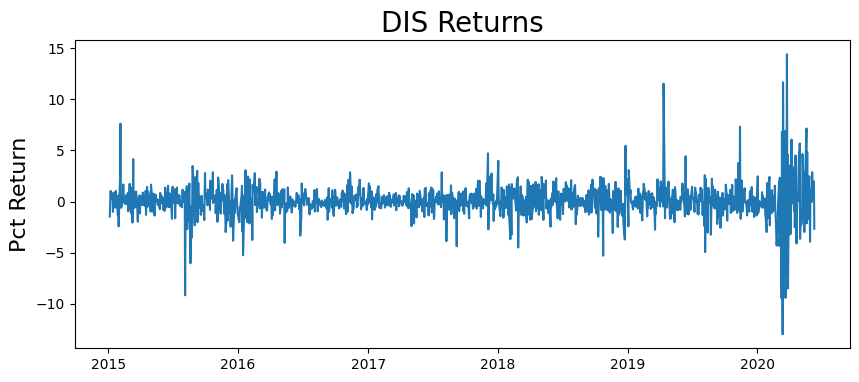

In [16]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

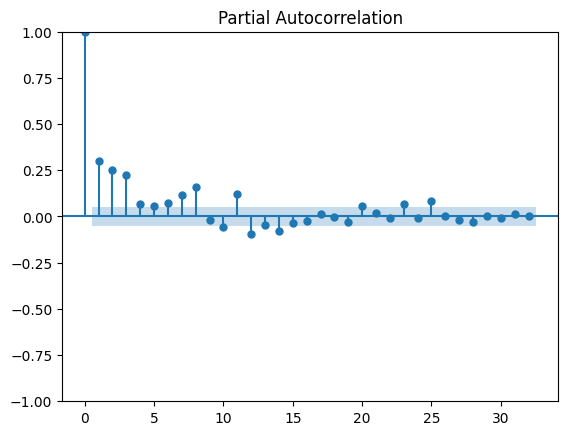

In [17]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [18]:
model = arch_model(returns, p=3, q=3)

In [19]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 228988901577.4842
Iteration:      2,   Func. Count:     22,   Neg. LLF: 972121391.5542662
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2730.9400090756862
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2486.3680277848653
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2320.026026693962
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2338.2675755871887
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2357.820639926478
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2398.1718584668674
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2296.4534483285292
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2296.44457037803
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2296.34347400013
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2296.3253069890934
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2296.308510934524
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2296.3

In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2296.30
Distribution:                  Normal   AIC:                           4608.61
Method:            Maximum Likelihood   BIC:                           4650.37
                                        No. Observations:                 1367
Date:                Wed, Jan 15 2025   Df Residuals:                     1366
Time:                        16:19:31   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.5558e-03  4.300e-02 -5.944e-02      0.953 [-8.683e-02,8.172e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5478      0.189      2.895  3.789e-03    [  0.177,  0.919]
alpha[1]       0.0681  3.919e-02      1.738  8.226e-02 [-8.711e-03,  0.145]
alpha[2]       0.2036  9.663e-02      2.107  3.509e-02  [1.424e-02,  0.393]
alpha[3]       0.3208      0.151      2.118  3.419e-02  [2.392e-02,  0.618]
beta[1]        0.0000      0.151      0.000      1.000    [ -0.295,  0.295]
beta[2]    1.1633e-14  9.814e-02  1.185e-13      1.000    [ -0.192,  0.192]
beta[3]        0.2242      0.153      1.464      0.143 [-7.597e-02,  0.524]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [21]:
model = arch_model(returns, p=3, q=0)

In [22]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3333.363661189638
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6658.5538348710215
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1257675.3234868161
Iteration:      4,   Func. Count:     31,   Neg. LLF: 188857.71504787775
Iteration:      5,   Func. Count:     38,   Neg. LLF: 7937.5440450651295
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2543.261418487595
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2455.4104557089827
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2312.3843625512714
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2311.875412859343
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2311.201553058229
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2311.1898678638245
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2311.188874485614
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2311.1887292650786
Iteration:     14,   Func. Count:     96,   Neg. LLF: 23

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2311.19
Distribution:                  Normal   AIC:                           4632.38
Method:            Maximum Likelihood   BIC:                           4658.48
                                        No. Observations:                 1367
Date:                Wed, Jan 15 2025   Df Residuals:                     1366
Time:                        16:19:31   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0143  4.002e-02      0.357      0.721 [-6.414e-02,9.271e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8612      0.138      6.222  4.904e-10    [  0.590,  1.132]
alpha[1]       0.0869  4.455e-02      1.950  5.121e-02 [-4.557e-04,  0.174]
alpha[2]       0.2619  9.096e-02      2.880  3.981e-03  [8.366e-02,  0.440]
alpha[3]       0.3583      0.169      2.125  3.361e-02  [2.778e-02,  0.689]
===========================================================================

Covariance estimator: robust
"""

In [24]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [25]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

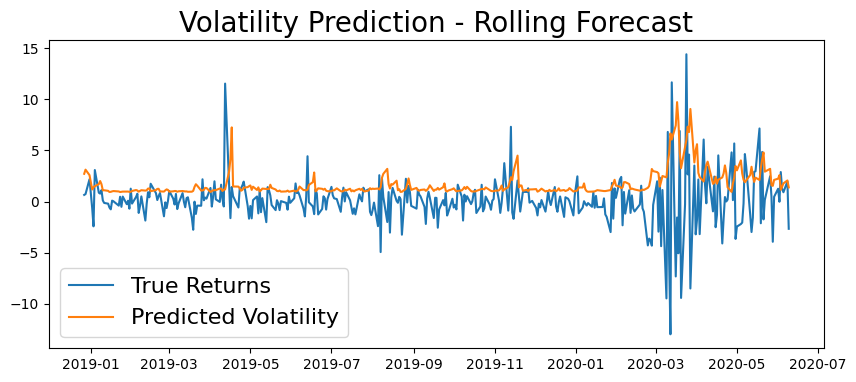

In [26]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [27]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [29]:
spy = yf.download('SPY', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [30]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

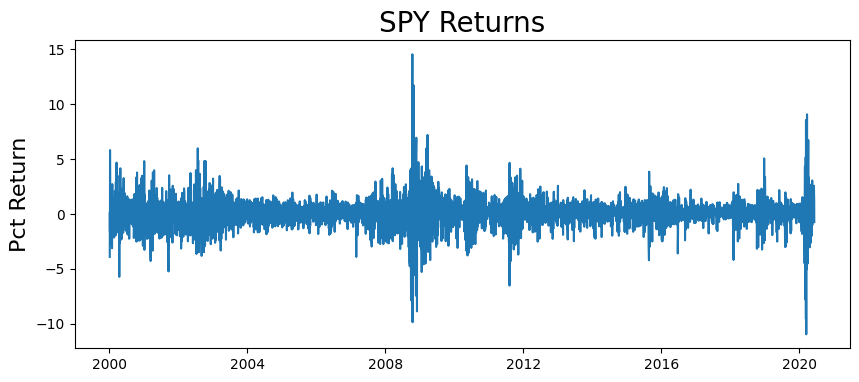

In [31]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

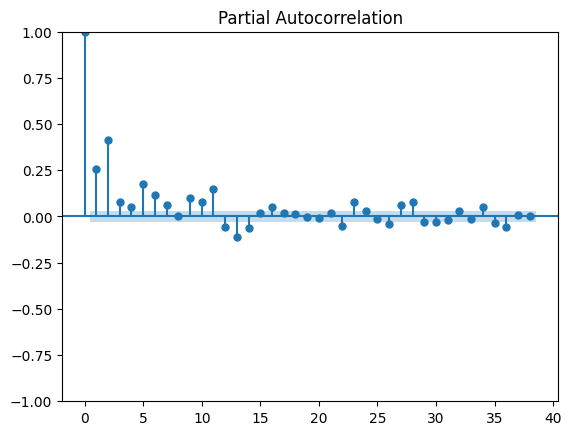

In [32]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [33]:
model = arch_model(returns, p=2, q=2)

In [34]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 94793.98463861311
Iteration:      2,   Func. Count:     21,   Neg. LLF: 63334.30827448543
Iteration:      3,   Func. Count:     33,   Neg. LLF: 11515.915718293458
Iteration:      4,   Func. Count:     42,   Neg. LLF: 9537.005422614224
Iteration:      5,   Func. Count:     51,   Neg. LLF: 7206.483828315324
Iteration:      6,   Func. Count:     59,   Neg. LLF: 7038.900499544549
Iteration:      7,   Func. Count:     67,   Neg. LLF: 7041.538363929877
Iteration:      8,   Func. Count:     76,   Neg. LLF: 7035.819743731638
Iteration:      9,   Func. Count:     84,   Neg. LLF: 7034.109408652523
Iteration:     10,   Func. Count:     91,   Neg. LLF: 7034.1070481350835
Iteration:     11,   Func. Count:     98,   Neg. LLF: 7034.106823290562
Iteration:     12,   Func. Count:    105,   Neg. LLF: 7034.106822007379
Iteration:     13,   Func. Count:    111,   Neg. LLF: 7034.106822007341
Optimization terminated successfully    (Exit mode 0)
        

In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    SPY   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7034.11
Distribution:                  Normal   AIC:                           14080.2
Method:            Maximum Likelihood   BIC:                           14119.5
                                        No. Observations:                 5140
Date:                Wed, Jan 15 2025   Df Residuals:                     5139
Time:                        16:20:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0741  1.092e-02      6.787  1.148e-11 [5.271e-02,9.552e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0416  1.005e-02      4.142  3.438e-05 [2.193e-02,6.132e-02]
alpha[1]       0.0853  2.318e-02      3.679  2.339e-04   [3.986e-02,  0.131]
alpha[2]       0.1356  2.868e-02      4.727  2.281e-06   [7.935e-02,  0.192]
beta[1]        0.2550      0.292      0.873      0.382     [ -0.317,  0.827]
beta[2]        0.4943      0.258      1.919  5.494e-02  [-1.047e-02,  0.999]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [36]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [37]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

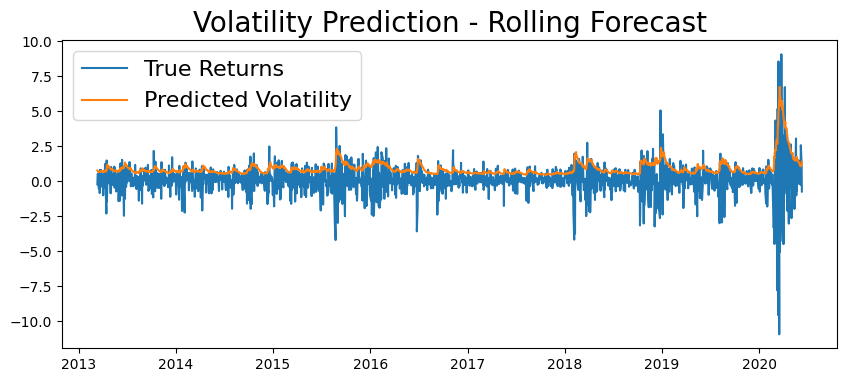

In [38]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [39]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [40]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

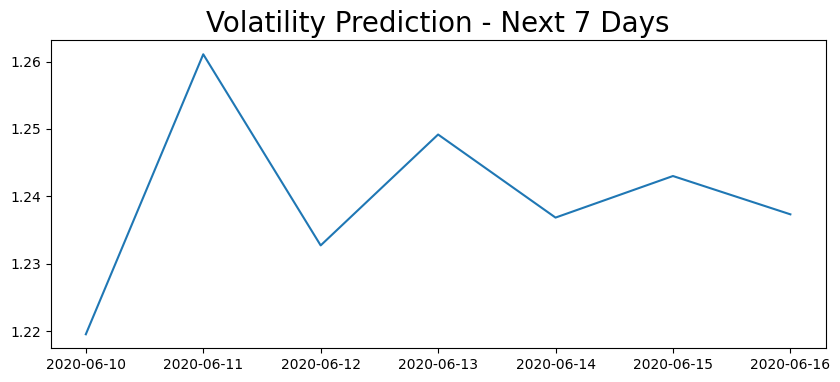

In [41]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)